**Import necessary libraries**

---



In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from folium.plugins import HeatMap
import seaborn as sns



import os

In [2]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 20.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%ls "/content/drive/MyDrive/Foundation of Data Science/Project/NYC_air_quality.csv"

'/content/drive/MyDrive/Foundation of Data Science/Project/NYC_air_quality.csv'


**Reading the files and try to understand the data is about what**

---



In [5]:
pollution = pd.read_csv("/content/drive/MyDrive/Foundation of Data Science/Project/NYC_air_quality.csv")
pollution.head(2)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420


In [6]:
# creating a geometry column
pollution = gpd.GeoDataFrame(pollution, geometry = gpd.points_from_xy(pollution.longitude, pollution.latitude))
pollution.head(2)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25,geometry
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,23.7,57.3,4.508813,POINT (-73.86932 40.84767)
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,23.7,57.8,5.462420,POINT (-73.86932 40.84767)


In [7]:
#After adding the gemoetry column the type of pollution is geo
type(pollution)

geopandas.geodataframe.GeoDataFrame

In [8]:
#rows and columns
pollution.shape

(169999, 32)

In [9]:
#data types
pollution.dtypes

SensorID         object
time              int64
latitude        float64
longitude       float64
bin0              int64
bin1              int64
bin2              int64
bin3              int64
bin4              int64
bin5              int64
bin6              int64
bin7              int64
bin8              int64
bin9              int64
bin10             int64
bin11             int64
bin12             int64
bin13             int64
bin14             int64
bin15             int64
bin16             int64
bin17             int64
bin18             int64
bin19             int64
bin20             int64
bin21             int64
bin22             int64
bin23             int64
temperature     float64
humidity        float64
pm25            float64
geometry       geometry
dtype: object

**Modify the time column in pollution data in aim to explore the date and hour this will help in analyzing**

---



In [10]:
#datetime_series from the time column, extract the date and the time in "Hours,Minutes,Seconds".Also, using the datetime results in datatypes to dattime64[ns]
pollution['datetime_series'] = pd.to_datetime(pollution['time'], unit='s')
pollution['datetime_series'].head(4)

0   2021-09-10 12:35:04
1   2021-09-10 12:35:08
2   2021-09-10 12:35:13
3   2021-09-10 12:35:18
Name: datetime_series, dtype: datetime64[ns]

In [11]:
#Extracts the time with "Hours,Minutes,Seconds" from datetime_series column
pollution['PerTime'] = pollution['datetime_series'].dt.time
pollution['PerTime'].head(4)

0    12:35:04
1    12:35:08
2    12:35:13
3    12:35:18
Name: PerTime, dtype: object

In [12]:
#Extracts the time with "Hours" only from datetime_series column
pollution['PerHour'] = pollution['datetime_series'].dt.hour
pollution['PerHour'].head(4)

0    12
1    12
2    12
3    12
Name: PerHour, dtype: int32

In [13]:
#Extracts the time with "Hours" only from datetime_series column
pollution['Date'] = pollution['datetime_series'].dt.date
pollution['Date'].head(4)

0    2021-09-10
1    2021-09-10
2    2021-09-10
3    2021-09-10
Name: Date, dtype: object

In [14]:
#Having the PMAM column to explore at which specific time "Morning, afternoon, or evening"
pollution['PMAM'] = pollution['datetime_series'].dt.strftime('%p')

In [15]:
#After we get the valuable infromation about time we will drop the column
pollution = pollution.drop('time', axis=1)

In [16]:
#Also we can drop the datetime_series column because we divide the this column to"PerTime, PerHour, Date, and PMAM"
pollution = pollution.drop('datetime_series', axis=1)

In [17]:
#Having the PerMonth column helps in knowing how many months are in the data
pollution['Date'] = pd.to_datetime(pollution['Date'])
pollution['PerMonth'] = pollution['Date'].dt.month

In [18]:
# i want the dates to be from 1 to 12 with the names of month so it became easy for the analysis
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
pollution['PerMonth'] = pollution['PerMonth'].map(month_names)

In [19]:
#Converting to PerDay to have more information about data
pollution['Date'] = pd.to_datetime(pollution['Date'])
pollution['PerDay'] = pollution['Date'].dt.strftime('%A')

In [20]:
#After adding five columns which is the PerTime, PerHour,date, PMAM, PerMonth, PerDay and removing one column which is time
pollution.head(2)

,SensorID,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,temperature,humidity,pm25,geometry,PerTime,PerHour,Date,PMAM,PerMonth,PerDay
0,NYCP2_CS01A,40.847672,-73.869316,11,1,1,0,0,0,0,...,23.7,57.3,4.508813,POINT (-73.86932 40.84767),12:35:04,12,2021-09-10,PM,September,Friday
1,NYCP2_CS01A,40.847668,-73.869316,22,4,1,0,0,2,0,...,23.7,57.8,5.462420,POINT (-73.86932 40.84767),12:35:08,12,2021-09-10,PM,September,Friday


In [21]:
# We have elements from september to december in this data
months_list = pollution['PerMonth'].unique().tolist()
print(months_list)

['September', 'October', 'November', 'December']


In [22]:
# Applying this code helps in understanding the data in depth.
# Count the occurrences of AM and PM values in the 'PerHour' column
ampm_counts = pollution.groupby('PMAM')['PerHour'].agg(['min', 'max', 'size'])
# Print the counts
print(ampm_counts)

      min  max    size
PMAM                  
AM      0   11   48631
PM     12   23  121368


I can Figure out the data with AM are from o to 11, and with PM from 12 to 23. Also, Most of the sensors are in PM not AM based on the size.

In [23]:
test1PM = pollution[(pollution['PerHour'] == 12)]
test1PM.head(1)

,SensorID,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,temperature,humidity,pm25,geometry,PerTime,PerHour,Date,PMAM,PerMonth,PerDay
0,NYCP2_CS01A,40.847672,-73.869316,11,1,1,0,0,0,0,...,23.7,57.3,4.508813,POINT (-73.86932 40.84767),12:35:04,12,2021-09-10,PM,September,Friday


In [24]:
test2AM = pollution[(pollution['PerHour'] == 5)]
test2AM.head(2)

,SensorID,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,temperature,humidity,pm25,geometry,PerTime,PerHour,Date,PMAM,PerMonth,PerDay
7388,NYCP2_CS01A,40.847309,-73.870819,128,12,2,0,0,0,0,...,16.4,78.2,2.743527,POINT (-73.87082 40.84731),05:00:03,5,2021-09-25,AM,September,Saturday
7389,NYCP2_CS01A,40.847309,-73.870819,144,20,2,0,1,1,0,...,16.4,78.3,4.503888,POINT (-73.87082 40.84731),05:00:08,5,2021-09-25,AM,September,Saturday


**Now the data is ready we can do some graphs to be more clear in exploring**

---



**Histogram for the three sensors **


1. SensorID_One_1

In [25]:
#S1 will contain all the rows from the pollution GeoDataFrame where the SensorID is 'NYCP2_CS01A'.
S1 = pollution[pollution['SensorID'] == 'NYCP2_CS01A']

In [26]:
# Using len() function helps in finding out the number of rows that contains 'NYCP2_CS01A' SensorID.
num_rows_S1 = len(S1)
print("Number of rows in S1:", num_rows_S1)

Number of rows in S1: 137455


In [27]:
# Calculate the frequency of each hour
hourly_frequency_S1 = S1.groupby('PerHour').size().sort_index()

In [28]:
# Find the hour with the maximum frequency
print(f"Hour with maximum frequency for SensorID 'S1': {hourly_frequency_S1.idxmax()} with frequency: {hourly_frequency_S1.max()}")

Hour with maximum frequency for SensorID 'S1': 14 with frequency: 12440


We can figure out that most of the sensors are in 14 which means 2:00PM, to be more sure about that we can have a histogram this will give us a clear picture about the Sensor1.

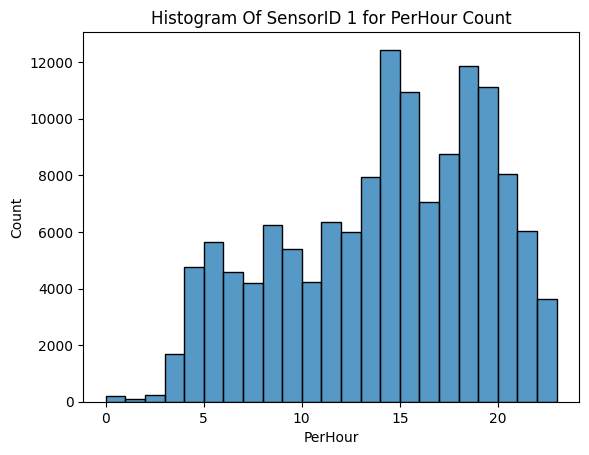

In [29]:
#Creating a histogram that shows the trend of Sensor 1.
S1 = pollution[pollution['SensorID'] == 'NYCP2_CS01A']
y_column = 'PerHour'

sns.histplot(data=S1, x=y_column, bins=np.arange(0, 24, 1))
plt.xlabel('PerHour')
plt.ylabel('Count')
plt.title('Histogram Of SensorID 1 for PerHour Count')
plt.show()

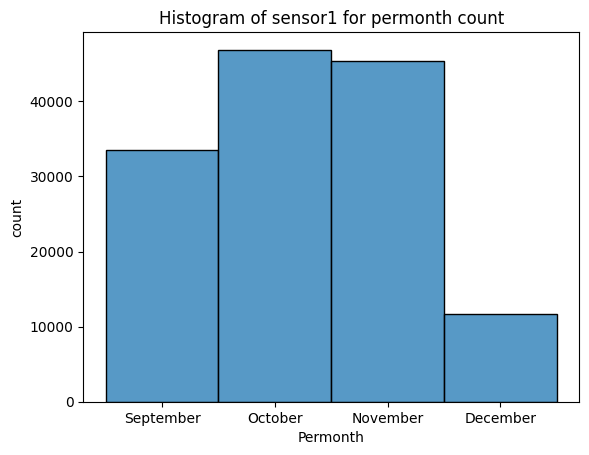

In [30]:
#Creating a histogram for months column for exploring
S1 = pollution[pollution['SensorID'] == 'NYCP2_CS01A']
y_column = 'PerMonth'

sns.histplot(data=S1, x=y_column, bins=20)
plt.xlabel('Permonth')
plt.ylabel('count')
plt.title('Histogram of sensor1 for permonth count')
plt.show()

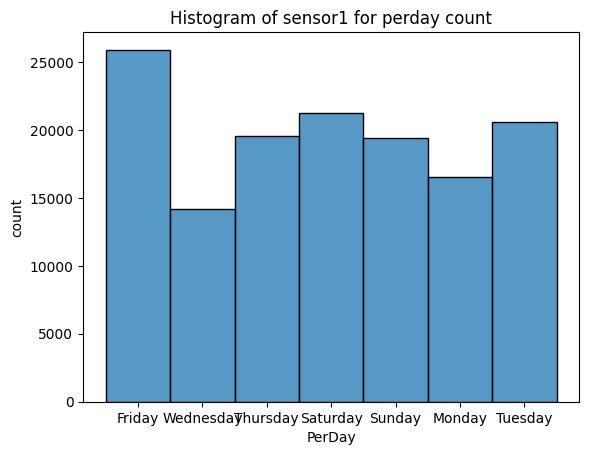

In [31]:
S1 = pollution[pollution['SensorID'] == 'NYCP2_CS01A']
y_column = 'PerDay'

sns.histplot(data=S1, x=y_column, bins=20)
plt.xlabel('PerDay')
plt.ylabel('count')
plt.title('Histogram of sensor1 for perday count')
plt.show()

2. SensorID_Two_2

In [32]:
#S2 will contain all the rows from the pollution GeoDataFrame where the SensorID is 'NYCP2_CS02A'.
S2 = pollution[pollution['SensorID'] == 'NYCP2_CS02A']

In [33]:
# Using len() function helps in finding out the number of rows that contains 'NYCP2_CS02A' SensorID.
num_rows_S2 = len(S2)
print("Number of rows in S2:", num_rows_S2)

Number of rows in S2: 24044


In [34]:
# Calculate the frequency of each hour
hourly_frequency_S2 = S2.groupby('PerHour').size().sort_index()

In [35]:
# Find the hour with the maximum frequency
print(f"Hour with maximum frequency for SensorID 'S2': {hourly_frequency_S2.idxmax()} with frequency: {hourly_frequency_S2.max()}")

Hour with maximum frequency for SensorID 'S2': 12 with frequency: 3437


We can figure out that most of the sensors are in 12 which means 12:00 PM, to be more sure about that we can have a histogram this will give us a clear picture about the Sensor2.

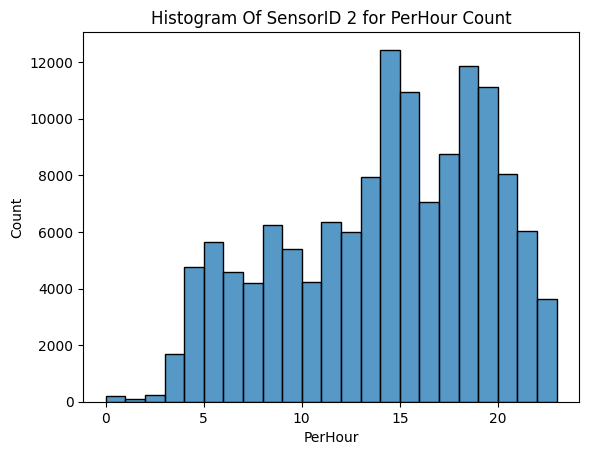

In [36]:
#Creating a histogram that shows the trend of Sensor 2.
S2 = pollution[pollution['SensorID'] == 'NYCP2_CS02A']
y_column = 'PerHour'

sns.histplot(data=S1, x=y_column,  bins=np.arange(0, 24, 1))
plt.xlabel('PerHour')
plt.ylabel('Count')
plt.title('Histogram Of SensorID 2 for PerHour Count')
plt.show()

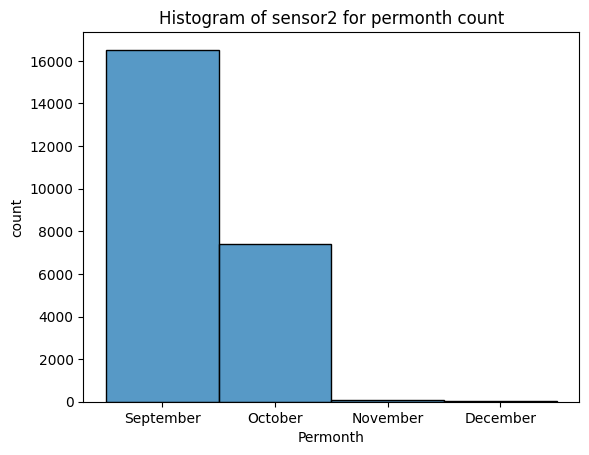

In [37]:
S2 = pollution[pollution['SensorID'] == 'NYCP2_CS02A']
y_column = 'PerMonth'

sns.histplot(data=S2, x=y_column, bins=20)
plt.xlabel('Permonth')
plt.ylabel('count')
plt.title('Histogram of sensor2 for permonth count')
plt.show()

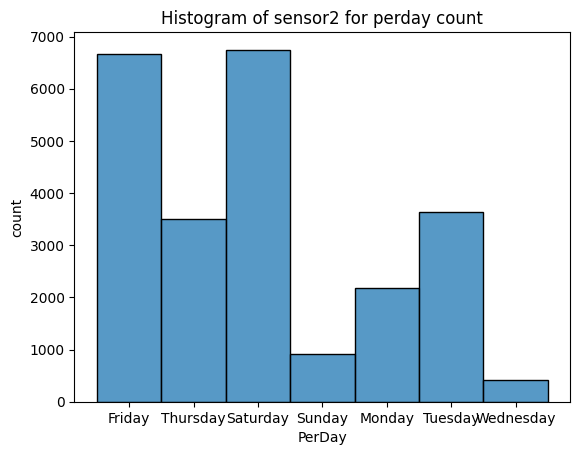

In [38]:
S2 = pollution[pollution['SensorID'] == 'NYCP2_CS02A']
y_column = 'PerDay'

sns.histplot(data=S2, x=y_column, bins=20)
plt.xlabel('PerDay')
plt.ylabel('count')
plt.title('Histogram of sensor2 for perday count')
plt.show()

3. SensorID_Three_3

In [39]:
#S3 will contain all the rows from the pollution GeoDataFrame where the SensorID is 'NYCP2_CS03A'.
S3 = pollution[pollution['SensorID'] == 'NYCP2_CS03A']

In [40]:
# Using len() function helps in finding out the number of rows that contains 'NYCP2_CS03A' SensorID.
num_rows_S3 = len(S3)
print("Number of rows in S3:", num_rows_S3)

Number of rows in S3: 8500


In [41]:
# Calculate the frequency of each hour
hourly_frequency_S3 = S3.groupby('PerHour').size().sort_index()

In [42]:
# Find the hour with the maximum frequency
print(f"Hour with maximum frequency for SensorID 'S3': {hourly_frequency_S3.idxmax()} with frequency: {hourly_frequency_S3.max()}")

Hour with maximum frequency for SensorID 'S3': 13 with frequency: 1636


We can figure out that most of the sensors are in 13 which means 1:00 PM, to be more sure about that we can have a histogram this will give us a clear picture about the Sensor2.

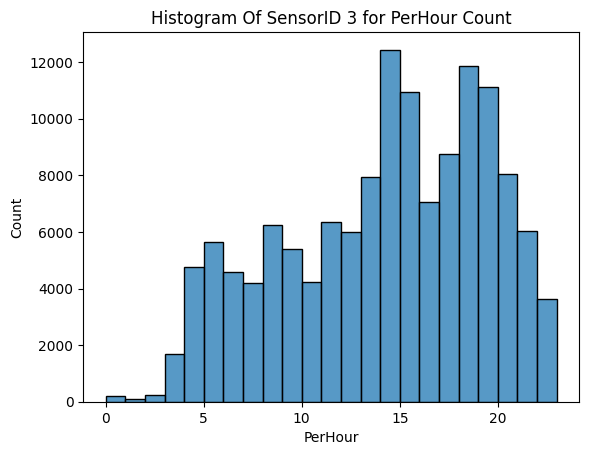

In [43]:
#Creating a histogram that shows the trend of Sensor 3.
S3 = pollution[pollution['SensorID'] == 'NYCP2_CS03A']
y_column = 'PerHour'

sns.histplot(data=S1, x=y_column, bins=np.arange(0, 24, 1))
plt.xlabel('PerHour')
plt.ylabel('Count')
plt.title('Histogram Of SensorID 3 for PerHour Count')
plt.show()

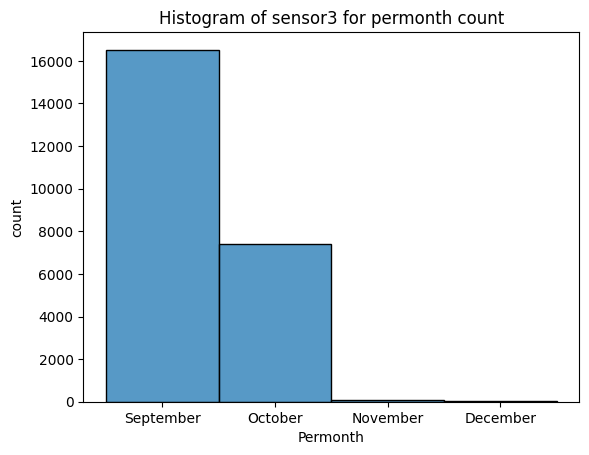

In [44]:
S3 = pollution[pollution['SensorID'] == 'NYCP2_CS02A']
y_column = 'PerMonth'

sns.histplot(data=S3, x=y_column, bins=20)
plt.xlabel('Permonth')
plt.ylabel('count')
plt.title('Histogram of sensor3 for permonth count')
plt.show()

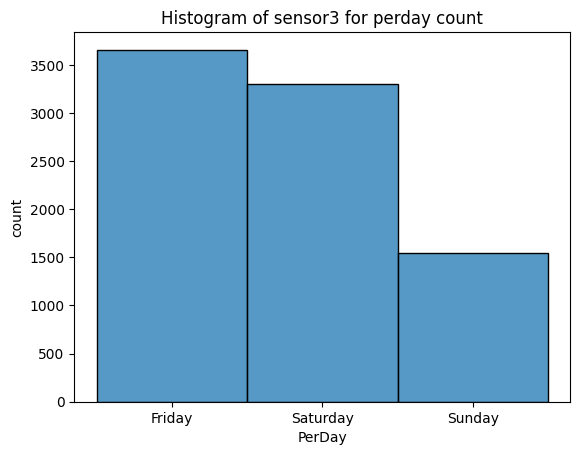

In [45]:
S3 = pollution[pollution['SensorID'] == 'NYCP2_CS03A']
y_column = 'PerDay'

sns.histplot(data=S3, x=y_column, bins=20)
plt.xlabel('PerDay')
plt.ylabel('count')
plt.title('Histogram of sensor3 for perday count')
plt.show()

In [46]:
#Here is the number of rows in each sensor which
print(f"Number of rows in S1: {num_rows_S1}")
print(f"Number of rows in S2: {num_rows_S2}")
print(f"Number of rows in S3: {num_rows_S3}")
print(f"Number of rows for all sensors: {num_rows_S1+num_rows_S2+num_rows_S3}")

Number of rows in S1: 137455
Number of rows in S2: 24044
Number of rows in S3: 8500
Number of rows for all sensors: 169999


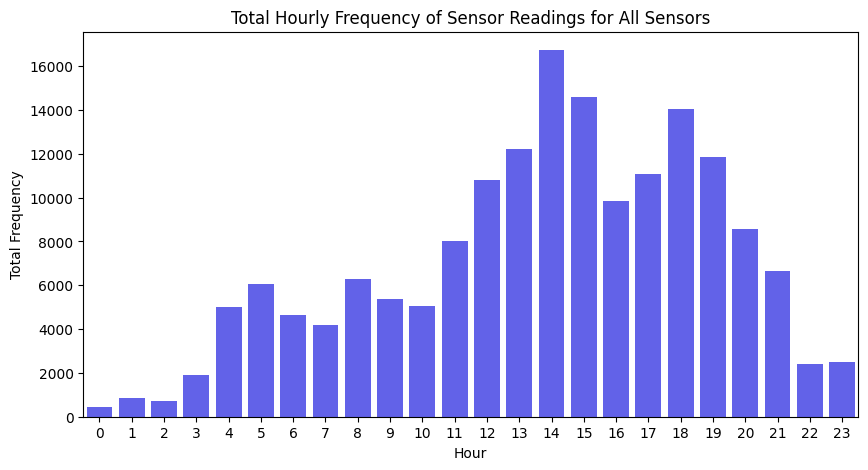

In [47]:
# Here is the distribuation for all sensors the Sensor 1,2, and 3, as we can see the sensors are activate more at 14:00 which means 2:00PM.
# Calculate the total frequency for each hour across all sensors
total_hourly_frequency = hourly_frequency_S1.add(hourly_frequency_S2, fill_value=0).add(hourly_frequency_S3, fill_value=0).sort_index()

# Plot the total frequency of readings for each hour across all sensors
plt.figure(figsize=(10, 5))
sns.barplot(x=total_hourly_frequency.index, y=total_hourly_frequency.values, color='blue', alpha=0.7)

plt.xlabel('Hour')
plt.ylabel('Total Frequency')
plt.title('Total Hourly Frequency of Sensor Readings for All Sensors')
plt.xticks(range(24))
plt.show()

We figure out the most of the sensors are having approximetaly same distribuation. Also, we figure out the most frequencies for each sensor this will help us to find the optimal place of each sensor.

We have three sensors and each of the sensor have more frequency at different time.

1. First sensor having more frequencies at 2:00 PM
2. Secound Sensor having more frequencies at 12:00 PM
3. Third sensor having more frequencies at 1:00PM

**In conclusion, after the analyzing part, I can highlight that the sensors are activate from 12:00PM to 2:00PM or 14 more than other timing.**

---


---




After finalizing the data, we will divide the data based on Septermber month, in Friday at 12:00 PM.

In [48]:
pollution.head()

,SensorID,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,temperature,humidity,pm25,geometry,PerTime,PerHour,Date,PMAM,PerMonth,PerDay
0,NYCP2_CS01A,40.847672,-73.869316,11,1,1,0,0,0,0,...,23.7,57.3,4.508813,POINT (-73.86932 40.84767),12:35:04,12,2021-09-10,PM,September,Friday
1,NYCP2_CS01A,40.847668,-73.869316,22,4,1,0,0,2,0,...,23.7,57.8,5.462420,POINT (-73.86932 40.84767),12:35:08,12,2021-09-10,PM,September,Friday
2,NYCP2_CS01A,40.847649,-73.869362,40,1,1,0,0,1,0,...,23.7,57.8,5.154881,POINT (-73.86936 40.84765),12:35:13,12,2021-09-10,PM,September,Friday
3,NYCP2_CS01A,40.847649,-73.869362,26,1,0,0,0,0,0,...,23.6,57.6,4.508813,POINT (-73.86936 40.84765),12:35:18,12,2021-09-10,PM,September,Friday
4,NYCP2_CS01A,40.847649,-73.869362,44,4,0,1,0,0,1,...,23.6,57.5,5.539503,POINT (-73.86936 40.84765),12:35:23,12,2021-09-10,PM,September,Friday


In [102]:
Sep_Sun = pollution[(pollution['PerMonth'] == 'September') & (pollution['PerDay'] == 'Sunday')]

In [103]:
Sep_Sun.head()

,SensorID,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,temperature,humidity,pm25,geometry,PerTime,PerHour,Date,PMAM,PerMonth,PerDay
12492,NYCP2_CS01A,40.844395,-73.871193,66,10,0,0,1,0,1,...,17.4,81.1,5.560276,POINT (-73.87119 40.84439),04:00:05,4,2021-09-26,AM,September,Sunday
12493,NYCP2_CS01A,40.844421,-73.871201,37,4,1,0,0,0,0,...,17.4,81.1,5.706193,POINT (-73.87120 40.84442),04:00:06,4,2021-09-26,AM,September,Sunday
12494,NYCP2_CS01A,40.844513,-73.871170,176,13,0,0,1,2,1,...,17.5,81.1,6.111493,POINT (-73.87117 40.84451),04:00:11,4,2021-09-26,AM,September,Sunday
12495,NYCP2_CS01A,40.844612,-73.871101,145,17,4,1,0,2,0,...,17.5,81.2,6.111493,POINT (-73.87110 40.84461),04:00:16,4,2021-09-26,AM,September,Sunday
12496,NYCP2_CS01A,40.844723,-73.871033,118,12,2,0,1,1,0,...,17.5,81.2,6.200021,POINT (-73.87103 40.84472),04:00:21,4,2021-09-26,AM,September,Sunday


In [104]:
num_rows = len(Sep_Sun)
print(f"There are {num_rows} rows in September_Sunday.")

There are 5924 rows in September_friday_12.


In [106]:
#only from 3AM to 12:00PM
hours_range = sorted(Sep_Sun['PerHour'].unique())
print("Hours range for Sunday in September:", hours_range)

Hours range for Sunday in September: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18]


In [107]:
#we can know how many data are in each sensoer, most are in sensoer 2
num_rows_S1 = (Sep_Sun['SensorID'] == 'NYCP2_CS01A').sum()
num_rows_S2 = (Sep_Sun['SensorID'] == 'NYCP2_CS02A').sum()
num_rows_S3 = (Sep_Sun['SensorID'] == 'NYCP2_CS03A').sum()

print(f"There are {num_rows_S1} rows in S1 in Sep_Fri_12.")
print(f"There are {num_rows_S2} rows in S2 in Sep_Fri_12.")
print(f"There are {num_rows_S3} rows in S3 in Sep_Fri_12.")

There are 4265 rows in S1 in Sep_Fri_12.
There are 112 rows in S2 in Sep_Fri_12.
There are 1547 rows in S3 in Sep_Fri_12.


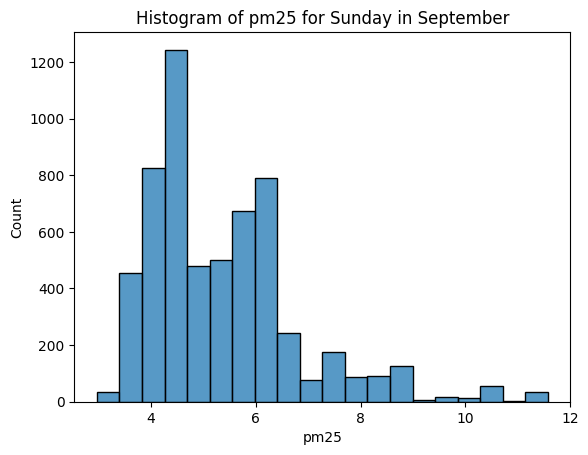

In [109]:
# PM2.5 is to measure fine particulate matter in the air, The "pm25" column contains measurements or readings of PM2.5 levels.
#as a starting point we will work with pm25 for Fridays in September so we did a histogram to analyze
sns.histplot(data=Sep_Sun, x='pm25', bins=20)
plt.xlabel('pm25')
plt.ylabel('Count')
plt.title('Histogram of pm25 for Sunday in September')
plt.show()

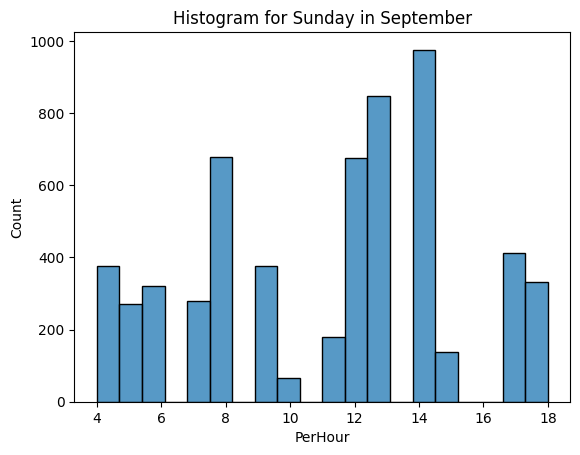

In [111]:
sns.histplot(data=Sep_Sun, x='PerHour', bins=20)
plt.xlabel('PerHour')
plt.ylabel('Count')
plt.title('Histogram for Sunday in September')
plt.show()

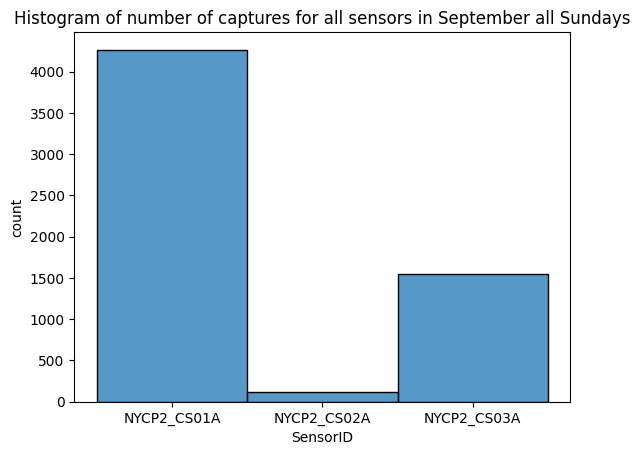

In [113]:
a ='SensorID'
sns.histplot(data= Sep_Sun, x=a, bins=20)
plt.xlabel('SensorID')
plt.ylabel('count' )
plt.title('Histogram of number of captures for all sensors in September all Sundays')
plt.show()

In [115]:
Sep_Sun.to_csv('Sep_Sun.csv', index=False)

In [116]:
# Define the file path
file_path = "/content/drive/MyDrive/Foundation of Data Science/Project/Sep_Sun.csv"

# Export the Sep_Fri_12 DataFrame to a CSV file
Sep_Sun.to_csv(file_path, index=False)


A dictionary called vars is created which contains the LP variables. The reference keys to the dictionary are the warehouse name, then the bar name([“A”][“2”]) , and the data is Route_Tuple. (e.g. [“A”][“2”]: Route_A_2). The lower limit of zero is set, the upper limit of None is set, and the variables are defined to be Integers.



```
A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Bars), 0, None, LpInteger)
```

[pulp](https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html)

In [117]:
import pandas as pd
import pulp
from math import radians, sin, cos, sqrt, atan2

def distance(lat1, lon1, lat2, lon2):
    # Calculate the distance between two points using Haversine formula
    R = 6371.0  # Radius of the Earth in kilometers
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
problem =None
def minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold):
    # Read pollution data from CSV file
    data = pd.read_csv(csv_file)

    # Initialize the ILP problem
    problem = pulp.LpProblem("MinimumCostDeployment", pulp.LpMinimize)

    # Decision variables
    num_sites = len(data)
    sensors = pulp.LpVariable.dicts("Sensor", range(num_sites), cat=pulp.LpBinary)

    # Objective function: minimize cost
    problem += pulp.lpSum([sensors[i] for i in range(num_sites)])

    # Constraints: pollution coverage
    for i in range(num_sites):
        problem += pulp.lpSum([sensors[j] for j in range(num_sites) if distance(data['latitude'][i], data['longitude'][i], data['latitude'][j], data['longitude'][j]) <= coverage_threshold]) >= 1

    # Constraint: budget constraint
    problem += pulp.lpSum([sensors[i] for i in range(num_sites)]) <= budget

    # Solve the problem
    problem.solve()
    # The status of the solution is printed to the screen
    print("Status:", LpStatus[problem.status])
    # Extract solution
    solution = []
    for i in range(num_sites):
        if sensors[i].varValue == 1:
            solution.append(i)

    return solution



In [118]:
# Example usage:
csv_file ="/content/drive/MyDrive/Foundation of Data Science/Project/Sep_Sun.csv"
budget = 5  # Example budget
coverage_threshold = 0.1  # Example coverage threshold in kilometers
connectivity_threshold = 10  # Example connectivity threshold in kilometers

# Call the function
solution = minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold)
print("Optimal sensor deployment:", solution)

Status: Infeasible
Optimal sensor deployment: [1003, 1007, 1014, 1017, 1020, 1023, 1038, 1042, 1045, 1048, 1051, 1058, 1060, 1065, 1085, 1093, 1115, 1118, 1123, 1175, 1188, 1202, 1215, 1218, 1221, 1226, 1229, 1235, 1262, 1295, 1319, 1325, 1328, 1333, 1355, 1364, 1443, 1449, 1471, 1479, 1531, 1544, 1558, 1829, 1919, 1934, 1940, 1945, 2289, 2306, 2434, 2570, 2605, 2684, 2689, 2720, 2725, 2727, 2820, 2852, 2866, 3171, 3213, 3318, 3332, 3387, 3422, 3432, 3832, 3837, 3844, 3950, 3956, 3972, 3995, 3998, 4001, 4004, 4011, 4022, 4037, 4053, 4058, 4064, 4067, 4070, 4073, 4076, 4080, 4084, 4087, 4093, 4097, 4100, 4113, 4125, 4141, 4145, 4148, 4153, 4176, 4265, 4445, 4458, 4490, 4494, 4502, 4505, 4508, 4511, 4517, 4524, 4529, 4746, 4750, 4753, 4759, 4856, 4868, 4968, 4975, 4984, 5018, 5038, 5046, 5061, 5149, 5339, 5748, 5760, 5765, 5779]
